In [1]:
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mnist import MNIST

In [2]:
class KMcluster():
    def __init__(self, X, y, n_clusters=3, initialize="random", max_iters=10):
        self.X = X
        self.y = y
        self.n_clusters = n_clusters
        self.initialize = initialize
        self.max_iters = max_iters

    # 随机初始化中心点
    def init_random(self):
        centroids = self.X[np.random.choice(n_samples, 4)]
        return centroids

    # KMeans++ 初始化中心点
    def init_kmeans_plusplus(self):
        n_samples, n_features = self.X.shape

        # step 1: 随机选取第一个中心点
        centroids = self.X[np.random.choice(n_samples, 1)]

        # 计算其余的中心点
        for k in range(0, self.n_clusters-1):
            distances = np.zeros((n_samples, k+1))

            # step 2: 计算每个样本到每一个聚类中心的欧式距离
            for i in range(len(centroids)):
                distances[:, i] = np.sqrt(np.sum(np.square(self.X - centroids[i]), axis=1))

            # step 3: 计算每个样本与最近聚类中心(指已选择的聚类中心)的距离D(x)
            dist = np.min(distances, axis=1)

            # step 4: 再取一个随机值，用权重的方式来取计算下一个“种子点”。具体实现是，先取一个能落在Sum(D(x))中的随机值Random，
            # 然后用Random -= D(x)，直到其<=0，此时的点就是下一个“种子点”。
            total = np.sum(dist) * np.random.rand()
            for j in range(n_samples):
                total -= dist[j]
                if total > 0:
                    continue
                centroids = np.r_[centroids, self.X[j].reshape(-1, 2)]
                break

        print(centroids)
        return centroids

    def assignment(self, centroids):
        n_samples = self.X.shape[0]
        distances = np.zeros((n_samples, self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.sum(np.square(self.X - centroids[i]), axis=1)
        return np.argmin(distances, axis=1)

    def update_center(self, flag, centroids):
        new_centroids = np.zeros_like(centroids)
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(self.X[flag == i], axis=0)
        return new_centroids

    def train(self):
        # step 1: generate center
        if self.initialize == "kmeans++":
            centroids = self.init_kmeans_plusplus()
        else:
            centroids = self.init_random()

        colmap = [i for i in range(self.n_clusters)]
        for i in range(self.max_iters):
            # step 2: assign centroid for each source data
            flag = self.assignment(centroids)

            plt.scatter(self.X[:, 0], self.X[:, 1], c=flag, marker=".", alpha=0.5)
            plt.scatter(centroids[:, 0], centroids[:, 1], c=colmap, marker="o", linewidths=6)
            plt.show()

            # step 3: re-caculate center
            new_centroids = self.update_center(flag, centroids)

            # 终止条件，如果重新计算的中心点与上一次的重复，则退出训练
            if (new_centroids == centroids).all():
                break
            else:
                centroids = new_centroids

            print("iters: ", i, ", center point: ", centroids)


(3000, 2)
[[ 4.92587439 -9.19692486]
 [-4.80677037 -3.19401563]
 [11.55548823 20.25962607]
 [ 7.76088581  9.81103523]
 [-2.78573168 -5.19931579]
 [ 1.79692983  0.5941572 ]
 [19.37342223  4.73019302]
 [ 0.49326471  8.94131805]
 [-6.81268964  6.12080967]
 [ 9.77502803 -9.49661839]]


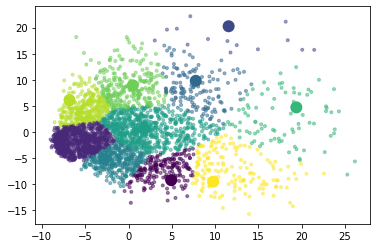

iters:  0 , center point:  [[ 3.96361332 -7.35548102]
 [-5.88505411 -1.65098618]
 [11.7571307  18.12811425]
 [ 7.75795461  8.27213984]
 [-1.40466198 -5.46078436]
 [ 2.06602666  0.54946494]
 [17.56431433  2.5013272 ]
 [-0.14312283  8.72088844]
 [-5.02320889  4.42382739]
 [11.83910847 -7.30930089]]


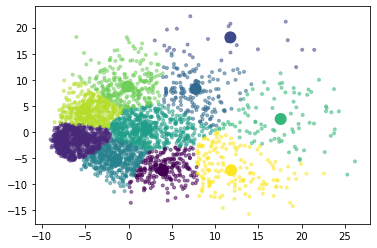

iters:  1 , center point:  [[ 4.12186819 -6.96904507]
 [-6.08246237 -1.62379699]
 [10.30504896 16.99045476]
 [ 7.73356125  7.45972194]
 [-1.46339856 -5.15588152]
 [ 2.19624004  0.59435881]
 [17.17392255  2.35061971]
 [-0.27983423  9.01115217]
 [-4.3492656   4.02711389]
 [11.93134649 -6.94791135]]


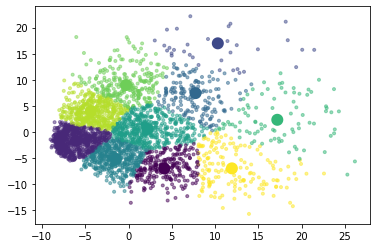

iters:  2 , center point:  [[ 4.25223266 -6.77400433]
 [-6.20950332 -1.60615301]
 [10.21179574 15.93627993]
 [ 7.56723469  6.71519677]
 [-1.54367234 -5.03376112]
 [ 2.21833479  0.58952706]
 [17.14393211  2.43931297]
 [-0.30645503  9.36749599]
 [-4.02028714  3.8663932 ]
 [12.11843968 -6.94798386]]


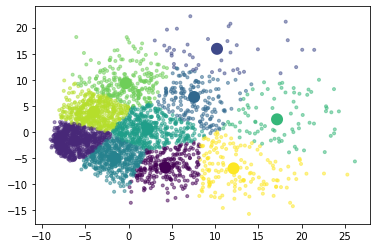

iters:  3 , center point:  [[ 4.40034066 -6.62636231]
 [-6.27097994 -1.61160815]
 [ 9.94307361 15.17542108]
 [ 7.60880813  6.01815654]
 [-1.56648348 -4.97180552]
 [ 2.19176721  0.5734845 ]
 [17.37725548  2.69722133]
 [-0.32275097  9.53334395]
 [-3.87466671  3.78911148]
 [12.47313386 -7.07308211]]


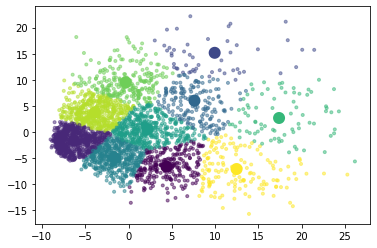

iters:  4 , center point:  [[ 4.49659244 -6.51233795]
 [-6.31288084 -1.61104066]
 [ 9.56498498 14.55383488]
 [ 7.64812111  5.26963831]
 [-1.57976738 -4.94419578]
 [ 2.11769173  0.54467455]
 [17.57712001  2.83340408]
 [-0.33308201  9.64441714]
 [-3.79280307  3.77986994]
 [12.68722112 -7.4056305 ]]


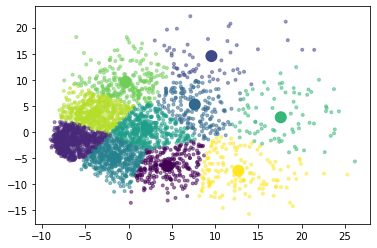

iters:  5 , center point:  [[ 4.53070041 -6.48823873]
 [-6.3495828  -1.61164904]
 [ 9.00942116 13.8604867 ]
 [ 7.61593843  4.53628669]
 [-1.59465085 -4.93974041]
 [ 1.94647318  0.53103665]
 [17.66708304  3.0657786 ]
 [-0.37579369  9.66633796]
 [-3.75995807  3.75490424]
 [12.75139573 -7.51862038]]


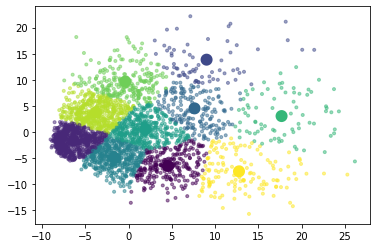

iters:  6 , center point:  [[ 4.60757907 -6.42366271]
 [-6.36348452 -1.61101982]
 [ 8.69983758 13.39534174]
 [ 7.58624791  4.05021726]
 [-1.60957577 -4.98422476]
 [ 1.76857353  0.49526708]
 [17.73044012  3.17833629]
 [-0.39852172  9.61381323]
 [-3.75329889  3.74430705]
 [12.91695565 -7.62815559]]


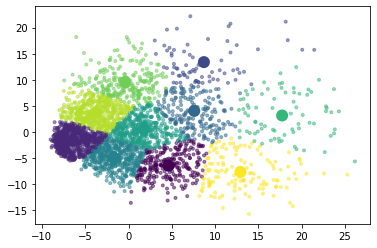

iters:  7 , center point:  [[ 4.64383405 -6.37587575]
 [-6.37622023 -1.61927651]
 [ 8.54935174 13.16895352]
 [ 7.45470328  3.58100881]
 [-1.60638134 -5.00701217]
 [ 1.50735169  0.4754026 ]
 [17.73818116  3.24622647]
 [-0.40715517  9.58429854]
 [-3.78039791  3.74112941]
 [12.99933369 -7.70888642]]


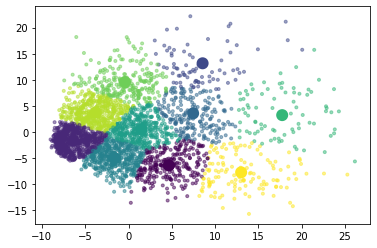

iters:  8 , center point:  [[ 4.6787384  -6.34043557]
 [-6.37622023 -1.61927651]
 [ 8.22050228 12.82108782]
 [ 7.37308281  3.06086171]
 [-1.61770801 -5.03265843]
 [ 1.2646129   0.5230893 ]
 [17.67829655  3.53205547]
 [-0.3835517   9.55494594]
 [-3.84439096  3.7832549 ]
 [13.14596791 -7.90431851]]


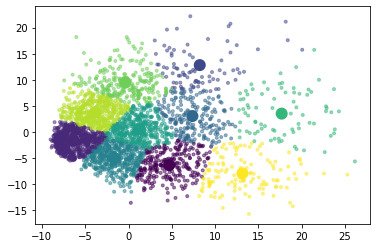

iters:  9 , center point:  [[ 4.72631926 -6.29462077]
 [-6.38314573 -1.62509083]
 [ 7.94269445 12.36003021]
 [ 7.39611669  2.5814026 ]
 [-1.60840448 -5.09883283]
 [ 1.07286907  0.58399662]
 [17.70726036  3.60583452]
 [-0.35178821  9.49227666]
 [-3.93195655  3.81499826]
 [13.28500733 -8.00072843]]


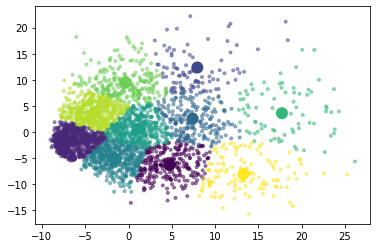

iters:  10 , center point:  [[ 4.7540645  -6.32392343]
 [-6.38396182 -1.63088212]
 [ 7.65930617 11.88016688]
 [ 7.42364342  2.16085809]
 [-1.58788716 -5.16734624]
 [ 0.91194933  0.61227176]
 [17.86442927  3.86756802]
 [-0.34728327  9.46694615]
 [-4.0144994   3.87393041]
 [13.36041332 -7.99369675]]


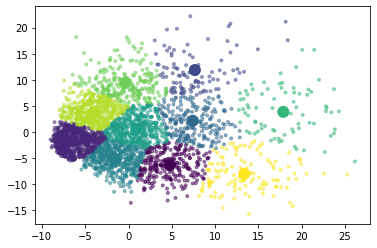

iters:  11 , center point:  [[ 4.69146613 -6.39919898]
 [-6.36987411 -1.65490199]
 [ 7.55442511 11.65348854]
 [ 7.43527286  1.75226486]
 [-1.54575608 -5.23677659]
 [ 0.74118547  0.64109612]
 [17.90838848  3.94141605]
 [-0.33867793  9.39613899]
 [-4.09895086  3.90792239]
 [13.45650063 -8.02222591]]


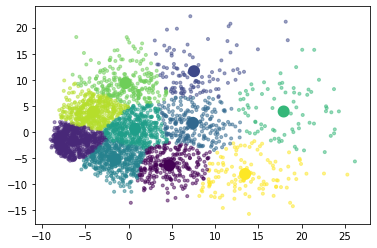

iters:  12 , center point:  [[ 4.70521369 -6.41898177]
 [-6.36691229 -1.66399134]
 [ 7.53173963 11.41432953]
 [ 7.42607557  1.50144084]
 [-1.53550942 -5.27247224]
 [ 0.64817958  0.64992414]
 [17.97550798  3.96924551]
 [-0.33463338  9.39252901]
 [-4.12927677  3.93561379]
 [13.56407252 -8.16450051]]


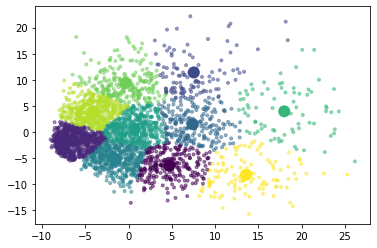

iters:  13 , center point:  [[ 4.73873035 -6.46037324]
 [-6.36691229 -1.66399134]
 [ 7.40862672 11.07374083]
 [ 7.41615863  1.27157163]
 [-1.5269798  -5.29219423]
 [ 0.58278125  0.6813655 ]
 [17.97550798  3.96924551]
 [-0.37281739  9.41624122]
 [-4.1713232   3.96567546]
 [13.65899465 -8.22199443]]


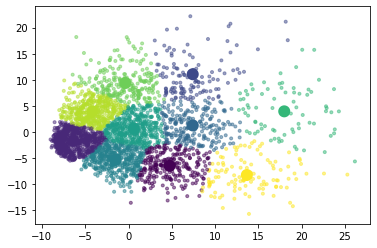

iters:  14 , center point:  [[ 4.77032106 -6.52999216]
 [-6.36384803 -1.66049451]
 [ 7.3186691  10.86247522]
 [ 7.41258155  1.09392008]
 [-1.52034443 -5.29621944]
 [ 0.57415933  0.7216474 ]
 [17.97550798  3.96924551]
 [-0.4290968   9.42572313]
 [-4.18793535  3.97403721]
 [13.75649332 -8.15926529]]


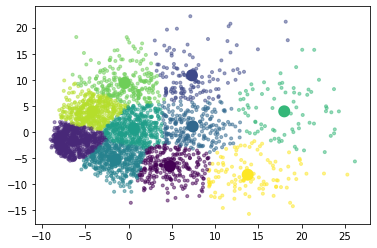

iters:  15 , center point:  [[ 4.76763869 -6.62212679]
 [-6.36384803 -1.66049451]
 [ 7.31437164 10.78599056]
 [ 7.40677964  0.95656354]
 [-1.51297725 -5.29113449]
 [ 0.55988175  0.75833913]
 [17.97550798  3.96924551]
 [-0.45095831  9.42340583]
 [-4.20763757  3.96624037]
 [13.85287346 -8.10704755]]


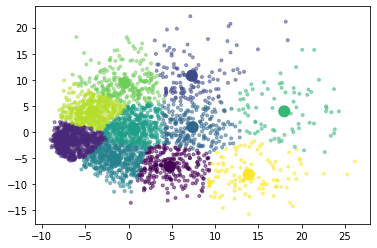

iters:  16 , center point:  [[ 4.81184981 -6.67372485]
 [-6.36384803 -1.66049451]
 [ 7.30413226 10.74772362]
 [ 7.36736304  0.90002095]
 [-1.49955073 -5.28116345]
 [ 0.5617929   0.78553456]
 [17.77711478  4.168239  ]
 [-0.4628803   9.44115466]
 [-4.2177406   3.96398114]
 [14.10217049 -8.05370243]]


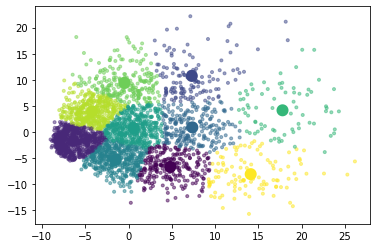

iters:  17 , center point:  [[ 4.83114332 -6.70316584]
 [-6.36384803 -1.66049451]
 [ 7.27918098 10.71304634]
 [ 7.34599976  0.87017761]
 [-1.48417268 -5.27212291]
 [ 0.54789845  0.81679308]
 [17.74311447  4.27337085]
 [-0.48274186  9.45498348]
 [-4.24150232  3.96668565]
 [14.15865642 -8.01198394]]


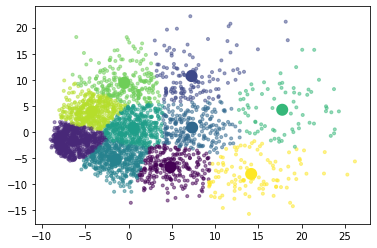

iters:  18 , center point:  [[ 4.85968741 -6.72370068]
 [-6.36384803 -1.66049451]
 [ 7.24849844 10.71332234]
 [ 7.38973327  0.81753915]
 [-1.46525529 -5.25761454]
 [ 0.5592228   0.85666785]
 [17.67491118  4.38592788]
 [-0.49929095  9.44930829]
 [-4.25119803  3.96490221]
 [14.31908707 -8.00145718]]


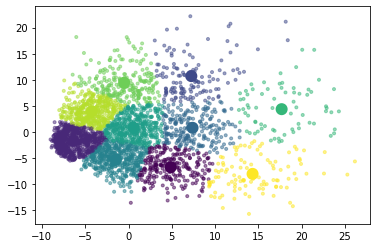

iters:  19 , center point:  [[ 4.86685871 -6.73392461]
 [-6.35825003 -1.66029715]
 [ 7.24849844 10.71332234]
 [ 7.40928831  0.78024037]
 [-1.45869612 -5.2447707 ]
 [ 0.56475128  0.88228395]
 [17.65341331  4.48726782]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.43642672 -8.0155484 ]]


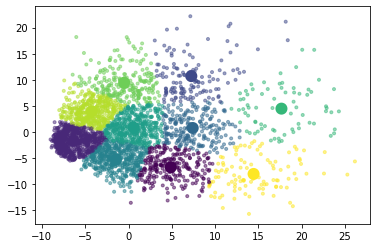

iters:  20 , center point:  [[ 4.90224517 -6.75702629]
 [-6.35825003 -1.66029715]
 [ 7.25014839 10.63833497]
 [ 7.38962342  0.71877938]
 [-1.45563334 -5.23825282]
 [ 0.56619467  0.88942938]
 [17.57320869  4.48684394]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.53411371 -7.98473627]]


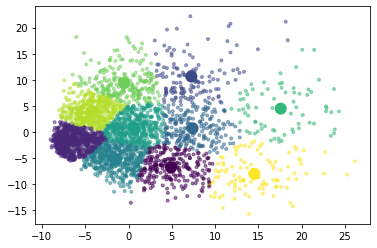

iters:  21 , center point:  [[ 4.94634945 -6.80001466]
 [-6.36384803 -1.66049451]
 [ 7.25014839 10.63833497]
 [ 7.40490672  0.71164765]
 [-1.45795172 -5.23001793]
 [ 0.57847737  0.88392186]
 [17.57320869  4.48684394]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.63524378 -7.9399835 ]]


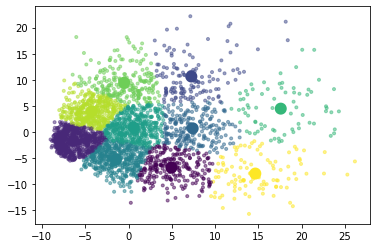

iters:  22 , center point:  [[ 5.00904708 -6.87055536]
 [-6.36384803 -1.66049451]
 [ 7.25014839 10.63833497]
 [ 7.41640937  0.6834181 ]
 [-1.43391269 -5.22291464]
 [ 0.58616133  0.88879147]
 [17.57320869  4.48684394]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.73792268 -7.9025199 ]]


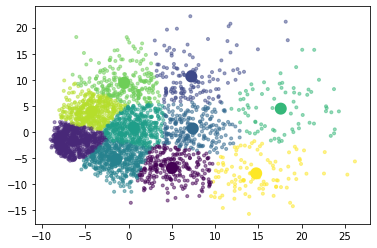

iters:  23 , center point:  [[ 5.02293196 -6.90261592]
 [-6.36384803 -1.66049451]
 [ 7.2644485  10.6011772 ]
 [ 7.40898674  0.63442582]
 [-1.42711839 -5.20354557]
 [ 0.60454634  0.9058987 ]
 [17.57320869  4.48684394]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.73792268 -7.9025199 ]]


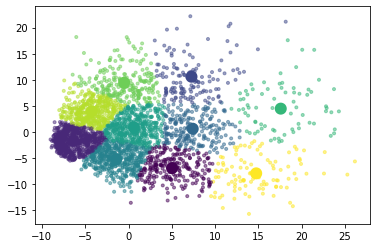

iters:  24 , center point:  [[ 5.04211524 -6.92572125]
 [-6.36384803 -1.66049451]
 [ 7.18151547 10.51148304]
 [ 7.42421609  0.59283644]
 [-1.41972644 -5.20406002]
 [ 0.61852748  0.90630387]
 [17.58428616  4.66631153]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.73792268 -7.9025199 ]]


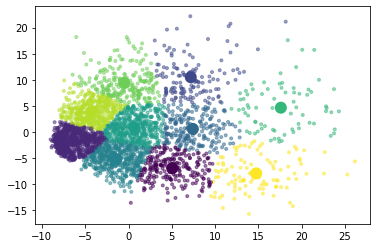

iters:  25 , center point:  [[ 5.07552557 -6.9456168 ]
 [-6.36384803 -1.66049451]
 [ 7.18151547 10.51148304]
 [ 7.42228691  0.57456056]
 [-1.3994648  -5.21244701]
 [ 0.61852748  0.90630387]
 [17.58428616  4.66631153]
 [-0.49929095  9.44930829]
 [-4.25894702  3.9660806 ]
 [14.73792268 -7.9025199 ]]


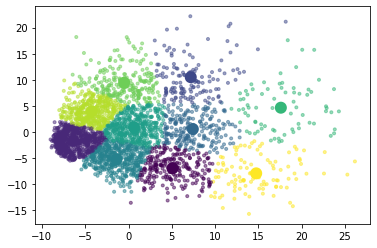

In [5]:
if __name__ == "__main__":

    # mnist dataset
    mndata = MNIST('C:/Users/k/Desktop/mnistdata')
    image_data_all, image_label_all = mndata.load_training()
    # mnist dataset 60000 samples, 图片统一维度 28*28，28*28 = 784
    train_data_num = 3000

    train_image = image_data_all[0:train_data_num]
    train_label = image_label_all[0:train_data_num]
    train_image = np.array(train_image)
    # Normalize the data
    train_image_norm = StandardScaler().fit_transform(train_image)
    # PCA 降维
    pca = PCA(n_components=2)
    train_image_pca = pca.fit(train_image_norm).transform(train_image_norm)
    print(train_image_pca.shape)

    train_label = np.array(train_label)
    # print(train_label.shape)

    km = KMcluster(train_image_pca, train_label, n_clusters=10, initialize="kmeans++", max_iters=50)
    km.train()